### Step 1: Import the libraries for VGG16

In [7]:
import keras,os, pathlib
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from sklearn import metrics
import numpy as np
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model
from collections import OrderedDict

In [2]:
train_dir = "C:/Users/alexa/Documents/Studium/Bachelor/Data2/trainimages/"
test_dir = "C:/Users/alexa/Documents/Studium/Bachelor/Data2/testimages/"

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)


# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

trdata=ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="C:/Users/alexa/Documents/Studium/Bachelor/Data2/trainimages/",target_size=(224,224), batch_size=32, class_mode='categorical')
tsdata=ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="C:/Users/alexa/Documents/Studium/Bachelor/Data2/testimages/", target_size=(224,224), batch_size=32, class_mode='categorical')

# augumented data
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)

#rotation_range=20,
#width_shift_range=0.2,
#height_shift_range=0.2,
# Load data
train_datagen_augmented2 = ImageDataGenerator(shear_range=0.2,
                                            zoom_range=0.2,
                                            horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle = False)
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle = False)

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
Found 799 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Found 799 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [9]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=256, activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [10]:
from keras.optimizers import Adam
opt=Adam(learning_rate=1e-6)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [12]:
#from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='accuracy', verbose = 1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
mc=ModelCheckpoint("vgg16_best_model_1.h5", monitor='val_accuracy',mode='max',save_best_only=True)
#early=EarlyStopping(monitor='accuracy', min_delta=0, patience=20, verbose=1, mode='auto')
hist=model.fit(traindata, epochs=150, steps_per_epoch=len(traindata), validation_data=test_data, validation_steps=len(testdata), verbose=1,callbacks=[mc])

Epoch 1/150
25/25 [==============================] - 392s 16s/step - loss: 2.3057 - accuracy: 0.0989 - val_loss: 2.3025 - val_accuracy: 0.1100
Epoch 2/150
25/25 [==============================] - 399s 16s/step - loss: 2.2683 - accuracy: 0.1715 - val_loss: 2.3024 - val_accuracy: 0.2050
Epoch 3/150
25/25 [==============================] - 408s 16s/step - loss: 2.2400 - accuracy: 0.2428 - val_loss: 2.3023 - val_accuracy: 0.2400
Epoch 4/150
25/25 [==============================] - 419s 17s/step - loss: 2.2117 - accuracy: 0.2441 - val_loss: 2.3022 - val_accuracy: 0.2450
Epoch 5/150
25/25 [==============================] - 483s 19s/step - loss: 2.1896 - accuracy: 0.3079 - val_loss: 2.3021 - val_accuracy: 0.2400
Epoch 6/150
25/25 [==============================] - 482s 19s/step - loss: 2.1646 - accuracy: 0.2829 - val_loss: 2.3020 - val_accuracy: 0.2550
Epoch 7/150
25/25 [==============================] - 484s 19s/step - loss: 2.1408 - accuracy: 0.3116 - val_loss: 2.3018 - val_accuracy: 0.2900

Epoch 58/150
25/25 [==============================] - 416s 17s/step - loss: 1.1363 - accuracy: 0.6483 - val_loss: 2.2943 - val_accuracy: 0.5050
Epoch 59/150
25/25 [==============================] - 417s 17s/step - loss: 1.1305 - accuracy: 0.6521 - val_loss: 2.2942 - val_accuracy: 0.4800
Epoch 60/150
25/25 [==============================] - 419s 17s/step - loss: 1.1283 - accuracy: 0.6483 - val_loss: 2.2942 - val_accuracy: 0.4950
Epoch 61/150
25/25 [==============================] - 418s 17s/step - loss: 1.1278 - accuracy: 0.6370 - val_loss: 2.2939 - val_accuracy: 0.4900
Epoch 62/150
25/25 [==============================] - 417s 17s/step - loss: 1.1097 - accuracy: 0.6571 - val_loss: 2.2939 - val_accuracy: 0.4950
Epoch 63/150
25/25 [==============================] - 420s 17s/step - loss: 1.1074 - accuracy: 0.6521 - val_loss: 2.2938 - val_accuracy: 0.5200
Epoch 64/150
25/25 [==============================] - 419s 17s/step - loss: 1.0902 - accuracy: 0.6621 - val_loss: 2.2937 - val_accuracy:

Epoch 115/150
25/25 [==============================] - 409s 16s/step - loss: 0.6927 - accuracy: 0.7997 - val_loss: 2.2896 - val_accuracy: 0.5400
Epoch 116/150
25/25 [==============================] - 406s 16s/step - loss: 0.6964 - accuracy: 0.8210 - val_loss: 2.2895 - val_accuracy: 0.5200
Epoch 117/150
25/25 [==============================] - 407s 16s/step - loss: 0.6878 - accuracy: 0.8160 - val_loss: 2.2895 - val_accuracy: 0.5700
Epoch 118/150
25/25 [==============================] - 405s 16s/step - loss: 0.7114 - accuracy: 0.7935 - val_loss: 2.2894 - val_accuracy: 0.5500
Epoch 119/150
25/25 [==============================] - 418s 17s/step - loss: 0.6789 - accuracy: 0.8010 - val_loss: 2.2893 - val_accuracy: 0.5400
Epoch 120/150
25/25 [==============================] - 406s 16s/step - loss: 0.6807 - accuracy: 0.8123 - val_loss: 2.2892 - val_accuracy: 0.5450
Epoch 121/150
25/25 [==============================] - 413s 17s/step - loss: 0.6581 - accuracy: 0.8223 - val_loss: 2.2891 - val_ac

In [7]:
import matplotlib.pyplot as plt
#plt.plot(hist.history["accuracy"])

#plt.plot(hist.history['loss'])

#plt.title("model accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("Epoch")
#plt.legend(["Accuracy", "loss"])
#plt.show()

1/1 [==============================] - 0s 281ms/step
[[5.8438446e-02 8.8181798e-05 3.6528066e-02 2.0468135e-01 2.4804930e-01
  2.0210797e-02 1.1944911e-01 8.7691046e-02 5.4908324e-02 1.6995540e-01]]
Hiphop


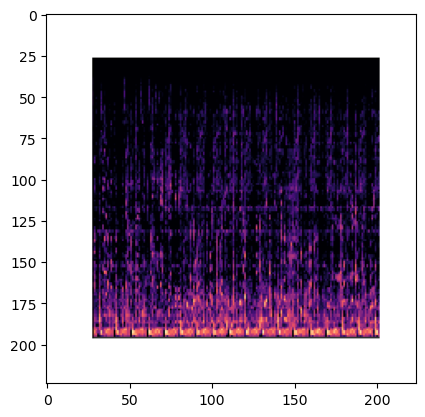

In [30]:
from keras.preprocessing import image
from keras.applications.vgg16 import decode_predictions
import tensorflow as tf
img = tf.keras.utils.load_img("C:/Users/alexa/Documents/Studium/Bachelor/Data2/testimages/hiphop/hiphop00005.png", target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model=load_model("vgg16_best_model_1.h5")
output = saved_model.predict(img)
print(output)
if ((output[0][0]>output[0][1]) and (output[0][0]>output[0][2]) and (output[0][0]>output[0][3]) and (output[0][0]>output[0][4]) and (output[0][0]>output[0][5]) and (output[0][0]>output[0][6]) and (output[0][0]>output[0][7]) and (output[0][0]>output[0][8]) and (output[0][0]>output[0][9])):
    print("Blues")
elif ((output[0][0]<output[0][1]) and (output[0][1]>output[0][2]) and (output[0][1]>output[0][3]) and (output[0][1]>output[0][4]) and (output[0][1]>output[0][5]) and (output[0][1]>output[0][6]) and (output[0][1]>output[0][7]) and (output[0][1]>output[0][8]) and (output[0][1]>output[0][9])):
    print("Classical")
elif((output[0][2]>output[0][0]) and (output[0][2]>output[0][1]) and (output[0][2]>output[0][3]) and (output[0][2]>output[0][4]) and (output[0][2]>output[0][5]) and (output[0][2]>output[0][6]) and (output[0][2]>output[0][7]) and (output[0][2]>output[0][8]) and (output[0][2]>output[0][9])):
    print("Country")
elif((output[0][3]>output[0][0]) and (output[0][3]>output[0][1]) and (output[0][3]>output[0][2]) and (output[0][3]>output[0][4]) and (output[0][3]>output[0][5]) and (output[0][3]>output[0][6]) and (output[0][3]>output[0][7]) and (output[0][3]>output[0][8]) and (output[0][3]>output[0][9])):
    print("Disco")
elif((output[0][4]>output[0][0]) and (output[0][4]>output[0][1]) and (output[0][4]>output[0][2]) and (output[0][4]>output[0][3]) and (output[0][4]>output[0][5]) and (output[0][4]>output[0][6]) and (output[0][4]>output[0][7]) and (output[0][4]>output[0][8]) and (output[0][4]>output[0][9])):
    print("Hiphop")
elif((output[0][5]>output[0][0]) and (output[0][5]>output[0][1]) and (output[0][5]>output[0][2]) and (output[0][5]>output[0][3]) and (output[0][5]>output[0][4]) and (output[0][5]>output[0][6]) and (output[0][5]>output[0][7]) and (output[0][5]>output[0][8]) and (output[0][5]>output[0][9])):
    print("Jazz")
elif((output[0][6]>output[0][0]) and (output[0][6]>output[0][1]) and (output[0][6]>output[0][2]) and (output[0][6]>output[0][3]) and (output[0][6]>output[0][4]) and (output[0][6]>output[0][5]) and (output[0][6]>output[0][7]) and (output[0][6]>output[0][8]) and (output[0][6]>output[0][9])):
    print("Metal")
elif((output[0][7]>output[0][0]) and (output[0][7]>output[0][1]) and (output[0][7]>output[0][2]) and (output[0][7]>output[0][3]) and (output[0][7]>output[0][4]) and (output[0][7]>output[0][5]) and (output[0][7]>output[0][6]) and (output[0][7]>output[0][8]) and (output[0][7]>output[0][9])):
    print("Pop")
elif((output[0][8]>output[0][0]) and (output[0][8]>output[0][1]) and (output[0][8]>output[0][2]) and (output[0][8]>output[0][3]) and (output[0][8]>output[0][4]) and (output[0][8]>output[0][5]) and (output[0][8]>output[0][6]) and (output[0][8]>output[0][7]) and (output[0][8]>output[0][9])):
    print("Reggae")
elif((output[0][9]>output[0][0]) and (output[0][9]>output[0][1]) and (output[0][9]>output[0][2]) and (output[0][9]>output[0][3]) and (output[0][9]>output[0][4]) and (output[0][9]>output[0][5]) and (output[0][9]>output[0][6]) and (output[0][9]>output[0][7]) and (output[0][9]>output[0][8])):
    print("Rock")    
                                    
    

                                                                                                                                                                                    

In [3]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks,classes)
    
    fmt='.2f' if normalize else 'd'
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

7/7 [==============================] - 19s 3s/step
Confusion Matrix
Normalized confusion matrix


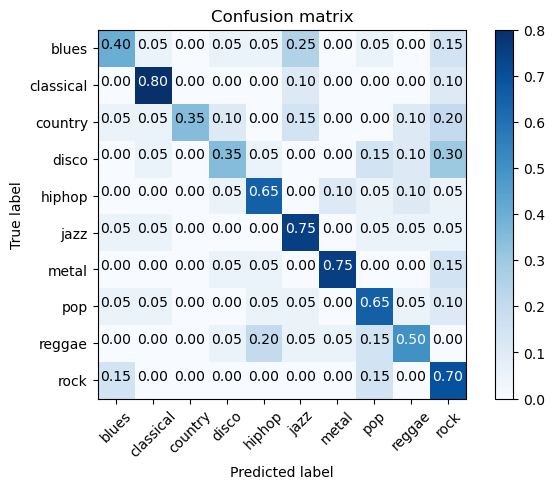

In [8]:
#Confusion Matrix
saved_model=load_model("vgg16_best_model_1.h5")
Y_pred=saved_model.predict(test_data)
y_pred=np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_data.classes,y_pred)
genres={'blues':0, 'classical':1, 'country':2, 'disco':3, 'hiphop':4, 'jazz':5, 'metal':6, 'pop':7, 'reggae':8, 'rock':9}
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()

plot_confusion_matrix(cm,keys,normalize=True)
plt.show()

In [12]:
def plot_loss_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss']))
    
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

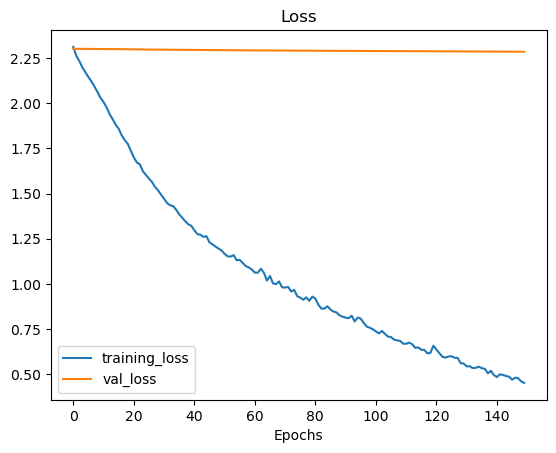

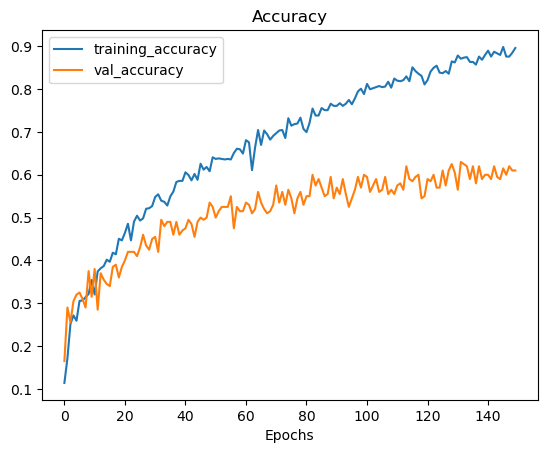

In [10]:
plot_loss_curves(hist)

In [11]:
model.evaluate(testdata)

7/7 [==============================] - 26s 4s/step - loss: 1.1721 - accuracy: 0.6100


[1.1721099615097046, 0.6100000143051147]

In [13]:
#model2 = Sequential()
#model2.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
#model2.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model2.add(Flatten())
#model2.add(Dense(units=256, activation="relu"))
#model2.add(Dense(units=128, activation="relu"))
#model2.add(Dense(units=10, activation="softmax"))

In [14]:
#opt=Adam(learning_rate=1e-6)
#model2.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:
#model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [18]:
#mc2=ModelCheckpoint("vgg16_best_model_2.h5", monitor='val_accuracy',mode='max',save_best_only=True)

#hist2=model2.fit(train_data_augmented, epochs=150, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data), verbose=1,callbacks=[mc2])

Epoch 1/150
25/25 [==============================] - 363s 15s/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/150
25/25 [==============================] - 378s 15s/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 3/150
25/25 [==============================] - 376s 15s/step - loss: 2.3026 - accuracy: 0.1001 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 4/150
25/25 [==============================] - 378s 15s/step - loss: 2.3025 - accuracy: 0.1014 - val_loss: 2.3023 - val_accuracy: 0.1050
Epoch 5/150
25/25 [==============================] - 379s 15s/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3023 - val_accuracy: 0.1000
Epoch 6/150
25/25 [==============================] - 374s 15s/step - loss: 2.3024 - accuracy: 0.0989 - val_loss: 2.3023 - val_accuracy: 0.1000
Epoch 7/150
25/25 [==============================] - 377s 15s/step - loss: 2.3024 - accuracy: 0.1039 - val_loss: 2.3022 - val_accuracy: 0.1000

Epoch 58/150
25/25 [==============================] - 395s 16s/step - loss: 2.2637 - accuracy: 0.2215 - val_loss: 2.2527 - val_accuracy: 0.2350
Epoch 59/150
25/25 [==============================] - 402s 16s/step - loss: 2.2617 - accuracy: 0.1727 - val_loss: 2.2463 - val_accuracy: 0.2200
Epoch 60/150
25/25 [==============================] - 403s 16s/step - loss: 2.2555 - accuracy: 0.2028 - val_loss: 2.2391 - val_accuracy: 0.2250
Epoch 61/150
25/25 [==============================] - 400s 16s/step - loss: 2.2475 - accuracy: 0.1927 - val_loss: 2.2312 - val_accuracy: 0.2200
Epoch 62/150
25/25 [==============================] - 397s 16s/step - loss: 2.2421 - accuracy: 0.1990 - val_loss: 2.2238 - val_accuracy: 0.2250
Epoch 63/150
25/25 [==============================] - 395s 16s/step - loss: 2.2381 - accuracy: 0.1915 - val_loss: 2.2143 - val_accuracy: 0.2200
Epoch 64/150
25/25 [==============================] - 391s 16s/step - loss: 2.2303 - accuracy: 0.1802 - val_loss: 2.2049 - val_accuracy:

Epoch 115/150
25/25 [==============================] - 392s 16s/step - loss: 1.9931 - accuracy: 0.2691 - val_loss: 1.9895 - val_accuracy: 0.2800
Epoch 116/150
25/25 [==============================] - 398s 16s/step - loss: 2.0028 - accuracy: 0.2678 - val_loss: 1.9851 - val_accuracy: 0.3250
Epoch 117/150
25/25 [==============================] - 389s 16s/step - loss: 2.0033 - accuracy: 0.2691 - val_loss: 1.9975 - val_accuracy: 0.2650
Epoch 118/150
25/25 [==============================] - 394s 16s/step - loss: 1.9856 - accuracy: 0.2829 - val_loss: 1.9867 - val_accuracy: 0.2800
Epoch 119/150
25/25 [==============================] - 395s 16s/step - loss: 1.9806 - accuracy: 0.2854 - val_loss: 1.9764 - val_accuracy: 0.3050
Epoch 120/150
25/25 [==============================] - 397s 16s/step - loss: 1.9943 - accuracy: 0.2879 - val_loss: 1.9783 - val_accuracy: 0.2800
Epoch 121/150
25/25 [==============================] - 390s 16s/step - loss: 2.0023 - accuracy: 0.2678 - val_loss: 1.9755 - val_ac

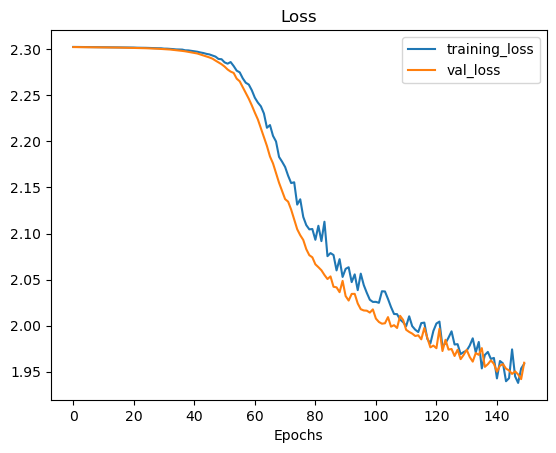

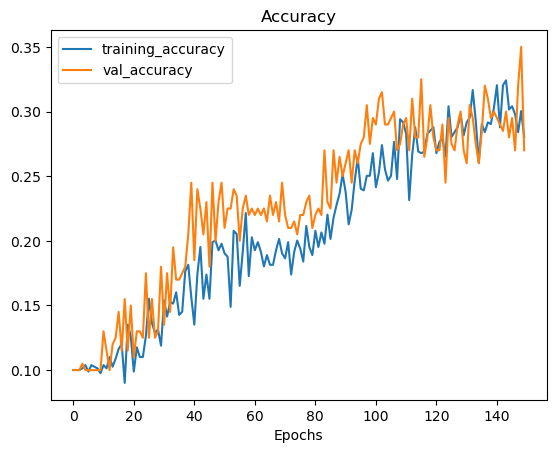

In [19]:
#plot_loss_curves(hist2)

In [20]:
#model2.evaluate(test_data)

7/7 [==============================] - 25s 3s/step - loss: 1.9597 - accuracy: 0.2700


[1.9597156047821045, 0.27000001072883606]

In [46]:
#model3 = Sequential()
#model3.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
#model3.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model3.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model3.add(Flatten())
#model3.add(Dense(units=4096, activation="relu"))
#model3.add(Dropout(0.2))
#model3.add(Dense(units=4096, activation="relu"))
#model3.add(Dropout(0.2))
#model3.add(Dense(units=10, activation="softmax"))

In [47]:
#opt3=Adam(learning_rate=1e-8)
#model3.compile(optimizer=opt3, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [48]:
#model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_92 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_94 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [49]:
# augumented data
#train_datagen_augmented2 = ImageDataGenerator(rescale=1/255.,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            rotation_range=20,
                                            horizontal_flip=True)
#test_datagen2 = ImageDataGenerator(rescale=1/255.)



# Load data
#train_data_augmented2 = train_datagen_augmented2.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              shuffle = False)
#test_data2 = test_datagen2.flow_from_directory(test_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            shuffle = False)

#mc3=ModelCheckpoint("vgg16_best_model_3.h5", monitor='val_accuracy',mode='max',save_best_only=True)

#hist3=model3.fit(train_data_augmented2, epochs=300, steps_per_epoch=len(train_data_augmented2), validation_data=test_data2, validation_steps=len(test_data2), verbose=1,callbacks=[mc3])

Found 799 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Epoch 1/300
25/25 [==============================] - 407s 16s/step - loss: 2.3026 - accuracy: 0.0901 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/300
25/25 [==============================] - 407s 16s/step - loss: 2.3026 - accuracy: 0.1026 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/300
25/25 [==============================] - 413s 17s/step - loss: 2.3026 - accuracy: 0.0876 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/300
25/25 [==============================] - 411s 16s/step - loss: 2.3026 - accuracy: 0.0939 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/300
25/25 [==============================] - 412s 16s/step - loss: 2.3026 - accuracy: 0.1064 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/300
25/25 [==============================] - 415s 17s/step - loss: 2.3026 - accuracy: 0.1076 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/300
25/25 [==============================] - 415s 

KeyboardInterrupt: 

In [ ]:
#plot_loss_curves(hist3)

In [ ]:
#model3.evaluate(test_data)

In [3]:
#traindata2 = train_datagen.flow_from_directory(directory="C:/Users/alexa/Documents/Studium/Bachelor/Data2/trainimages/",target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False)

#testdata2 = test_datagen.flow_from_directory(directory="C:/Users/alexa/Documents/Studium/Bachelor/Data2/testimages/", target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False)

Found 799 images belonging to 10 classes.
Found 200 images belonging to 10 classes.


In [6]:
#model4 = Sequential()
#model4.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same",activation="relu"))
#model4.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model4.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model4.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model4.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model4.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#model4.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
#model4.add(Flatten())
#model4.add(Dense(units=256, activation="relu"))
#model4.add(Dense(units=128, activation="relu"))

#model4.add(Dense(units=10, activation="softmax"))

In [7]:
#opt4=Adam(learning_rate=0.01)
#model4.compile(optimizer=opt4, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [8]:
#model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [9]:
#mc4=ModelCheckpoint("vgg16_best_model_4.h5", monitor='val_accuracy',mode='max',save_best_only=True)

#hist4=model4.fit(train_data_augmented, epochs=300, steps_per_epoch=len(train_data_augmented), validation_data=test_data, validation_steps=len(test_data), verbose=1,callbacks=[mc4])

Epoch 1/300
50/50 [==============================] - 387s 8s/step - loss: 17627738112.0000 - accuracy: 0.1101 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 2/300
50/50 [==============================] - 405s 8s/step - loss: 4.6561 - accuracy: 0.0388 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 3/300
50/50 [==============================] - 411s 8s/step - loss: 2.3188 - accuracy: 0.0601 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 4/300
50/50 [==============================] - 417s 8s/step - loss: 2.3156 - accuracy: 0.0401 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 5/300
50/50 [==============================] - 415s 8s/step - loss: 2.3125 - accuracy: 0.0413 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 6/300
50/50 [==============================] - 412s 8s/step - loss: 2.3116 - accuracy: 0.0200 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 7/300
50/50 [==============================] - 392s 8s/step - loss: 2.3150 - accuracy: 0.0601 - val_loss: 2.3027 - val_accuracy: 0.1

KeyboardInterrupt: 

## References


Source: Great Learning & Rohini G. (2021, September 23). Everything you need to know about VGG16 - Great Learning - Medium. Medium. Retrieved April 14, 2023, from https://medium.com/@mygreatlearning/everything-you-need-to-know-about-vgg16-7315defb5918

Source: Bourke, D. (2020). 03. Convolutional Neural Networks and Computer Vision with TensorFlow: Multi-class Classification. Zero to Mastery TensorFlow for Deep Learning. Retrieved April 14, 2023, from https://dev.mrdbourke.com/tensorflow-deep-learning/03_convolutional_neural_networks_in_tensorflow/#multi-class-classification

Source: Thakur, R. (2023, March 9). Beginner’s Guide to VGG16 Implementation in Keras. Built In. Retrieved April 14, 2023, from https://builtin.com/machine-learning/vgg16

From: Ahmad, F., & Sahil, N. (2019) Plot_CM.py [Source Code] (Accessed April 23, 2023) https://github.com/sahilsharma884/Music-Genre-Classification/blob/master/Plot_CM.py

From: Ahmad, F., & Sahil, N. (2019) CNN_Model.py [Source Code] (Accessed April 23, 2023) https://github.com/sahilsharma884/Music-Genre-Classification/blob/master/CNN_Model.py